In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tools.tex_1D_visualization as vis

In [2]:
#TeX settings
fname_json = 'tools/TUI_FRI_colors.json'
xlabel = '$\ppdelta$ / $\lambda$'
ylabel = '$\norm{ \ascanvec (\pp) -  \ascanvechat (\pphat) }_{2}$'
x_y_reverse = False

# fname setting for loading data
fnpy_path = 'npy_data/mse'
#ftex_path = '/Users/sayakokodera/Uni/Master/RP/19SS/Slides/figures/pytikz/1D/coordinates'
ftex_path = '/Users/sayakokodera/Uni/Master/RP/19SS/Paper/figures/pytikz/1D/coordinates'

In [13]:
# Generate tex files
r"""
(1) Iterate over fnames
(2) Set all fnames (fnpy_offset, fnpy_approx, ftex_offset, ftex_approx)
(3) Load data
(4) Set x values
(5) Call vis.generate_coordinates(x_values_input, file_name, x_y_reverse, *args)

fnpy:
0mm_away = 20190806_15h01m01s
halflambda_away = 20190731_21h03m52s
1mm_away = 20190731_21h09m13s
2.5mm_away = 20190806_15h04m56s
5mm_away = 20190805_16h43m24s
"""
# fanems: for 0mm away, half lambda away, 1mm away, 2.5mm away, 5mm away
fnpy_list = ['20190806_15h01m01s', '20190806_15h04m56s', '20190805_16h43m24s']
#['20190731_21h03m52s', '20190731_21h09m13s', '20190731_21h15m53s'] #['20190805_16h43m24s'] 
ftex_list = ['0mm_away', '2_5mm_away', '5mm_away']
# TeX setting
colors = ['fri_gray_dark', 'tui_red', 'fri_green'] # blue = offset, orange = approx
mark = ['']
linestyles = ['line width = 1pt']

for idx in range(len(fnpy_list)):
    # Current fnpy & ftex
    curr_fnpy = fnpy_list[idx]
    curr_ftex = ftex_list[idx]
    # (2) 
    fnpy_offset = '{}/SE_offset_{}.npy'.format(fnpy_path, curr_fnpy)
    #fnpy_approx = '{}/SE_approx_x_{}.npy'.format(fnpy_path, curr_fnpy)
    ftex_offset = '{}/se_offset/se_offset_{}.tex'.format(ftex_path, curr_ftex)
    #ftex_approx = '{}/se_approx_{}.tex'.format(ftex_path, curr_ftex)

    # (3)
    se_offset = np.load(fnpy_offset)
    #se_approx = np.load(fnpy_approx)
    
    # (4)
    x_value = se_offset[:, 0] # normalized w/ lambda! 
    
    # (5)
    # offset
    vis.generate_coordinates_for_addplot(x_value, ftex_offset, x_y_reverse, [colors[idx]], [linestyles[0]], 
                                         se_offset[:, 1])
    # approx
    #vis.generate_coordinates_for_addplot(x_value, ftex_approx, x_y_reverse, [colors[1]],[linestyles[1]], 
    #                                     se_approx[:, 1])
    

0
1
2


In [5]:
# Generate TeX files for GD and PosErr
r"""
(1) Load data
(2) Concatenare data into one matrix, shape data int othe correct shape
(3) x_value setting
(4) TeX setup
(5) Iterate over data.shape[1]
(6) name seting for tex file 
(7) Export data into tex file
"""
# npy data access
#data_date = '20190805_13h05m44s' # err_max = 2* wavelength
#str_errmax = "errmax_2lambda"
data_date = '20190805_14h12m05s' # err_max = 5* wavelength
str_errmax = "errmax_5lambda"

# (1)
# 7.5mm away, 5mm away, 2,5mm away, 1mm away, halflambda away
gd_se_rawdata = np.load('{}/GD_SE_{}.npy'.format(fnpy_path, data_date))
gd_pe_rawdata = np.load('{}/GD_PosErr_{}.npy'.format(fnpy_path, data_date))

# (2) 
# Remove the first row(= x_values)
gd_se = np.array(gd_se_rawdata)
gd_se = np.delete(gd_se, 0, axis = 1)
gd_pe = np.array(gd_pe_rawdata)
gd_pe = np.delete(gd_pe, 0, axis = 1)
# Reverse the column order (so that the 1st column = half lambda away)
gd_se = np.flip(gd_se, axis = 1)
gd_pe = np.flip(gd_pe, axis = 1)

# (3)
x_value = gd_se_rawdata[:, 0]

# (4)
# Set up the list for ftex
ftex_list = ['halflambda_away', '1mm_away', '2_5mm_away', '5mm_away', '7_5mm_away']
# Other TeX setup
colors = ['tui_blue', 'tui_orange', 'tui_red', 'fri_green', 'fri_gray_dark']
# for slides
linestyles = ['line width = 2pt', 'line width = 2pt', 'line width = 2pt', 'line width = 2pt', 
              'line width = 2pt, dashed']
# for paper
linestyles = ['line width = 1pt', 'line width = 1pt', 'line width = 1pt', 'line width = 1pt', 
              'line width = 1pt, dashed']


# (5)
for idx in range(len(ftex_list)):
    # (6)
    ftex_gd_se = '{}/{}/gd_se_{}.tex'.format(ftex_path, str_errmax, ftex_list[idx])
    ftex_gd_pe = '{}/{}/gd_pe_{}.tex'.format(ftex_path, str_errmax, ftex_list[idx])
    
    # (7)
    # gd_se
    vis.generate_coordinates_for_addplot(x_value, ftex_gd_se, x_y_reverse, [colors[idx]], [linestyles[idx]], 
                                         gd_se[:, idx])
    # gd_pe
    vis.generate_coordinates_for_addplot(x_value, ftex_gd_pe, x_y_reverse, [colors[idx]], [linestyles[idx]], 
                                         gd_pe[:, idx])

In [4]:
# Concatenation of different data
se_gd = np.array([se_gd_20190731_20h08m04s[:, 1]])
pe_gd = np.array([pe_gd_20190731_20h08m04s[:, 1]])
for idx in range(se_gd_20190612_20h39m29s.shape[1] - 1):
    col_idx = se_gd_20190612_20h39m29s.shape[1] - 1 - idx # reverse the order
    # SE
    curr_se = np.array([se_gd_20190612_20h39m29s[:, col_idx]])
    se_gd = np.append(se_gd, curr_se, axis = 0)
    # PosErr
    curr_pe = np.array([pe_gd_20190612_20h39m29s[:, col_idx]])
    pe_gd = np.append(pe_gd, curr_pe, axis = 0)  
# Transpose se_gd and pe_gd
se_gd = se_gd.T
pe_gd = pe_gd.T

(101, 5)

In [3]:
# fname for txt data
ftxt = 'txtdata/meas_signals.txt'
data = np.loadtxt(ftxt)

In [5]:
data.shape

(101, 11)

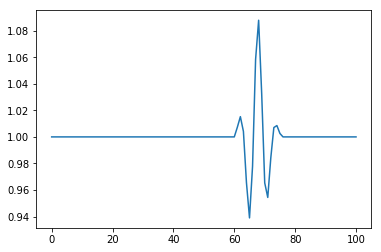

In [11]:
pulse0 = data[:, 1]
pulse0 = pulse0 + 1
plt.plot(pulse0)

In [23]:
# convert the data into tex coordinate files
# Set up the fnames
ftexpath = '/Users/sayakokodera/Uni/Master/RP/19SS/Slides/figures/pytikz/1D/coordinates/pulse'
# TeX setup
colors = ['tui_blue', 'fri_green', 'tui_red', 'tui_orange', 'fri_gray_dark']
# for slides
linestyles = ['line width = 2pt']
# reverse
x_y_reverse = True
# x_value
x_value = data[:, 0]
# pulse columns
pulse_col = [0, 1, 2, 3, 4, 6, 7, 8, 9]

# for the 1-4 columns in data
for idx in range(4):
    # Select the proper index
    left_idx = idx + 1
    right_idx_tex = 9 - idx
    right_idx_data = 10 - idx
    # Choose the proper pulse
    pulse_left = data[:, left_idx] + (left_idx)
    pulse_right = data[:, right_idx_data] + right_idx_tex
    # Set up ftex
    ftex_left = '{}/pulse_{}_blue.tex'.format(ftexpath, left_idx)
    ftex_right = '{}/pulse_{}_blue.tex'.format(ftexpath, right_idx_tex)
    # convert the pulse into tex: left
    vis.generate_coordinates_for_addplot(x_value, ftex_left, x_y_reverse, [colors[0]], [linestyles[0]], 
                                         pulse_left)
    # convert the pulse into tex: right
    vis.generate_coordinates_for_addplot(x_value, ftex_right, x_y_reverse, [colors[0]], [linestyles[0]], 
                                         pulse_right)
    
# for the 5th column in data
pulse = data[:, 5] + 5
ftex5 = '{}/pulse_{}_blue.tex'.format(ftexpath, 5)
vis.generate_coordinates_for_addplot(x_value, ftex5, x_y_reverse, [colors[0]], [linestyles[0]], 
                                         pulse)
# for highlighting 
highlight_cols = [0, 2, 3]
for idx, col in enumerate(highlight_cols):
    pulse = data[:, col+1] + (col+1)
    # Set up ftex
    ftex = '{}/pulse_{}_highlight.tex'.format(ftexpath, col+1)
    # convert the pulse into tex
    vis.generate_coordinates_for_addplot(x_value, ftex, x_y_reverse, [colors[idx + 1]], [linestyles[0]], 
                                         pulse)